In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math
import holidays
import pandas as pd
# %matplotlib notebook

# Interpretazione dati
All'interno del file txt sono presenti dei campioni dei consumi elettrici di un edificio collocato in Olanda.
Ad essi non è associata alcuna data, di conseguenza non è possibile effettuare un'analisi accurata, ma è comunque possibile effettuare alcune considerazioni interessanti.

In [2]:
plt.rcParams["figure.figsize"] = (20,10)
with open('power_data_eamonn-1.txt', 'r') as f:
    x = f.readlines()
#x
x = np.array([int(i) for i in x if i != '\n'])
print(len(x), x)
DAY = 96

35040 [950 939 943 ... 627 633 882]


Il numero di campioni rilevati è pari 35040 che diviso per in numero di giorni in un anno(365) e per il numero di ore in un giorno(24) si ottiene il valore 4: si può ipotizzare che la frequenza campionaria è di 15 minuti e che quindi il numero di campioni giornalieri sia pari a 9. Plottando i dati è possibile verificare se effettivamente questa ipotesi possa essere valida.

Di seguito vengono effettuate le medie di ciascuna finestra da 96 campioni, ovvero i presunti consumi medi giornalieri e vengono plottati in sovrapposizione i campioni dei primi due ipotetici mesi e l'istogramma dei consumi giornalieri medi.
Imponendo che la larghezza di un blocco appartenente all'istogramma sia largo quanto la distanza tra 96 campioni si può verificare facilmente per via grafica che l'ipotesi fatta è perfettamente sensata.

In [3]:
x_day = np.mean(np.vstack([x[i*DAY:(i+1)*DAY] for i in range(len(x)//DAY)]), axis=1)
x_day.shape

(365,)

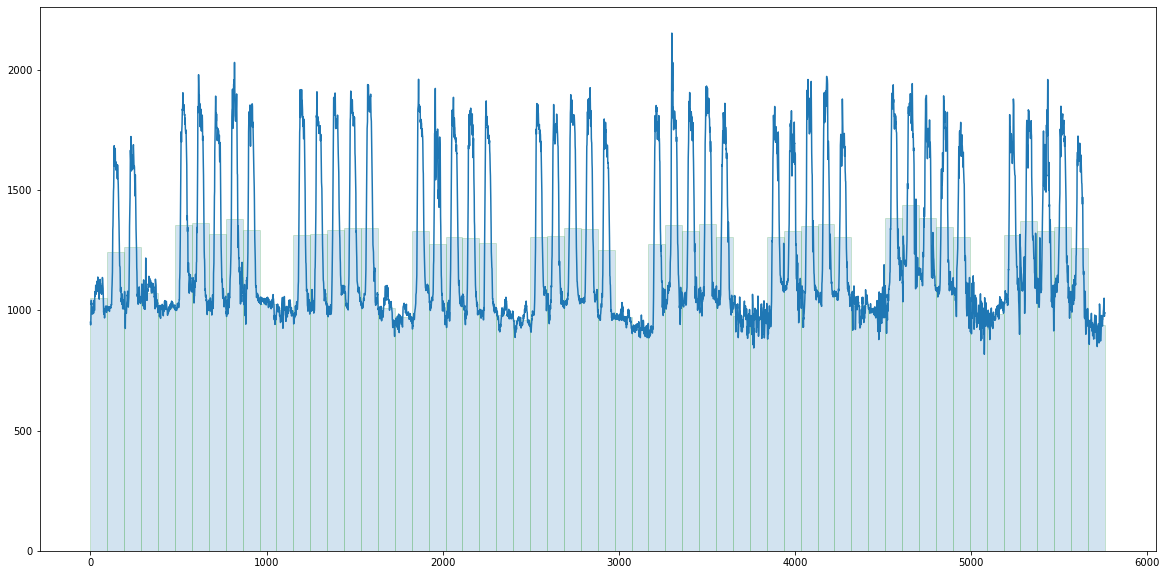

In [4]:
plt.close()
plt.plot(x[:DAY*60])
plt.bar(np.arange(0, DAY*60, DAY) + DAY/2, x_day[:60], width=DAY, alpha=0.2, edgecolor='C2')
plt.show()
# plt.savefig('a.svg')

Dalla morfologia del grafico è anche facile individuare quale giorno della settimana associare a ciascuna finestra da 96 campioni. Sovrapponendo al grafico dei campioni un istogramma rappresentante i giorni della settimana è possibile fare un'ulteriore verifica riguardo alla validità dell'ipotesi fatta in precedenza.

Di seguito, viene inoltre fornito un algoritmo molto semplice che riesce ad individuare con discreta precisione i possibili giorni che presentano anomalie: se la media dei consumi di un determinato giorno lavorativo/festivo si discosta di molto dai valori del giorno lavorativo/festivo a lui precedente, è possibile considerare la presenza di un anomalia dei consumi.

In [5]:
'''
prev = 0
for idx, (a, b) in enumerate(zip(x_day, x_day[1:])):
    if b - a > 200: # domenica
        print(idx, idx - prev)
        prev = idx
'''
list_anomalies = []
dayweek = []
sday = []
for idx, a in enumerate(x_day):
    dayweek.append((idx+2) % 7)
    if idx > 7:
        avg = np.median([x_day[idx-7*dx] for dx in range(5) if idx - 7*dx >= 0])
    else:
        avg = np.median([x_day[idx+7*dx] for dx in range(5) if idx + 7*dx >= 0])
    if (idx+2) % 7 < 5:
        # print('settimanale', x_day[idx])
        if x_day[idx] > avg * 1.05 or x_day[idx] < avg * 0.95:
            print('settimanale', idx, dayweek[-1])
            sday.append(idx)
        if x_day[idx] > avg * 1.2 or x_day[idx] < avg * 0.8:
            print('super settimanale', idx, dayweek[-1])
            list_anomalies.append(idx)
    else:
        # print('festivo', x_day[idx])
        if x_day[idx] > avg * 1.05 or x_day[idx] < avg * 0.95:
            print('festivo', idx, dayweek[-1])
            sday.append(idx)
        if x_day[idx] > avg * 1.2 or x_day[idx] < avg * 0.8:
            print('super festivo', dayweek[-1])
            list_anomalies.append(idx)

dayweek = np.array(dayweek)

settimanale 0 2
super settimanale 0 2
settimanale 1 3
festivo 3 5
settimanale 8 3
festivo 32 6
settimanale 47 0
settimanale 48 1
settimanale 64 3
festivo 66 5
festivo 67 6
settimanale 68 0
settimanale 70 2
settimanale 71 3
settimanale 86 4
super settimanale 86 4
festivo 87 5
settimanale 89 0
super settimanale 89 0
settimanale 90 1
settimanale 119 2
super settimanale 119 2
settimanale 120 3
settimanale 121 4
festivo 122 5
festivo 123 6
settimanale 124 0
super settimanale 124 0
settimanale 127 3
super settimanale 127 3
settimanale 128 4
settimanale 138 0
super settimanale 138 0
festivo 199 5
festivo 200 6
festivo 206 5
festivo 207 6
settimanale 230 1
festivo 234 5
festivo 235 6
settimanale 236 0
settimanale 237 1
settimanale 238 2
settimanale 239 3
settimanale 240 4
festivo 262 5
festivo 263 6
festivo 276 5
festivo 297 5
settimanale 303 4
festivo 304 5
settimanale 306 0
festivo 318 5
settimanale 323 3
settimanale 330 3
settimanale 337 3
settimanale 356 1
settimanale 357 2
settimanale 358

In [6]:
holidays_netherlands = holidays.CountryHoliday('Netherlands')

holi = []
YEAR = 1997
for d in pd.date_range(start=f'01-01-{YEAR}', end=f'31-12-{YEAR}', freq='1D'):
    if d in holidays_netherlands:
        print(d, holidays_netherlands.get(d), d.dayofyear - 1)
        holi.append(d.dayofyear - 1)
holi = np.array([])

1997-01-01 00:00:00 Nieuwjaarsdag 0
1997-03-28 00:00:00 Goede Vrijdag 86
1997-03-30 00:00:00 Eerste paasdag 88
1997-03-31 00:00:00 Tweede paasdag 89
1997-04-30 00:00:00 Koninginnedag 119
1997-05-08 00:00:00 Hemelvaart 127
1997-05-18 00:00:00 Eerste Pinksterdag 137
1997-05-19 00:00:00 Tweede Pinksterdag 138
1997-12-25 00:00:00 Eerste Kerstdag 358
1997-12-26 00:00:00 Tweede Kerstdag 359


In [7]:
list_anomalies += [i for i in holi]
for d in holi:
    for dx in range(-3, 3):
        if d + dx in sday:
            list_anomalies.append(d+dx)

In [14]:
new_anomalies = []
for d in list_anomalies:
    d -= (d+2) % 7 # il primo giorno dell'anno è un mercoledì
    new_anomalies += [d + i for i in  range(7)]
    # new_anomalies += [d + 4 - i for i in range(7) if d + 4 - i > 0]
list_anomalies = list(set(list_anomalies+new_anomalies))

In [15]:
y = np.zeros(x.shape)
for h in list_anomalies:
    for i in range(0, DAY):
        y[DAY * h + i] = 1

In [16]:
dataset = pd.DataFrame({'x': x, 'holidays': y})
dataset.to_pickle('train2.pkl')

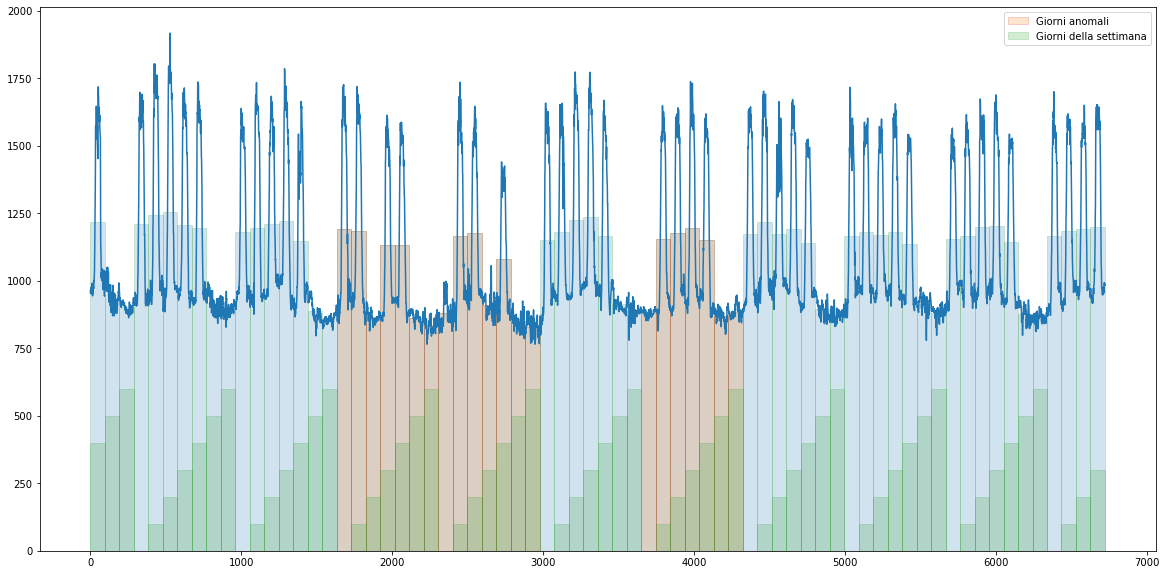

In [19]:
LIML = 100
LIMR = 170

plt.close()
tmp = np.array([a for a in list_anomalies if LIML <= a < LIMR])
plt.plot(x[DAY*LIML:DAY*LIMR])
plt.bar(np.arange(0, DAY*(LIMR-LIML), DAY) + DAY/2, x_day[LIML:LIMR], width=DAY, alpha=0.2, edgecolor='C2')
if len(tmp) > 0:
    plt.bar((tmp-LIML) * DAY + DAY/2, x_day[tmp], width=DAY, alpha=0.2, edgecolor='C3', label = "Giorni anomali")
plt.bar(np.arange(0, DAY*(LIMR-LIML), DAY) + DAY/2, 100 * dayweek[LIML:LIMR], width=DAY, alpha=0.2, edgecolor='C2', label = "Giorni della settimana")

plt.bar((holi[(holi>=LIML)&(holi<LIMR)]-LIML) * DAY + DAY/2, 800, width=DAY, alpha=0.6, color='C5')

plt.legend()
plt.show()